In [50]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [5]:
import plotly.figure_factory as ff
import plotly.express as px
import chart_studio.plotly as py
import plotly.tools as tls

#### Read the initial dataset into pandas dataframe

In [66]:
vacc = pd.read_csv("Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")

In [69]:
vacc.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,...,0.0219,0.0560,0.0020,0.1058,0.0008,0.7649,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.529795 34.518525, -87.5297...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,...,0.0487,0.0014,0.0006,0.3984,0.0006,0.5365,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.29705899999999 33.349083, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,...,0.0068,0.0020,0.0045,0.4776,0.0000,0.5005,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.165662 31.542897, -87.1653...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,...,0.3016,0.0430,0.0158,0.0408,0.0029,0.5679,POINT (-111.664616 34.293239),AZ,"MULTIPOLYGON (((-111.685911 33.204637, -111.61...",MULTIPOLYGON (((-114.516842 33.027885999999995...
4,1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,...,0.0262,0.0018,0.0040,0.2655,0.0010,0.6917,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.415774 31.490413, -85.4153...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


#### Engineered 2 new features 'Probably not' and 'Unsure' population from 

In [10]:
vacc['Probably not'] = vacc["Estimated hesitant"] - vacc["Estimated strongly hesitant"]
vacc['Unsure'] = vacc['Estimated hesitant or unsure']- vacc['Probably not']

In [71]:
# Histogram showing the number of counties with adults strongly hesitant to vaccination
px.histogram(vacc, x="Estimated strongly hesitant", hover_data=vacc.columns)

In [ ]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('non-Hispanick Black')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic Black", y="Estimated strongly hesitant")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic Black", y="Probably not")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic Black", y="Unsure")

In [14]:
vacc['Estimated strongly hesitant'].describe() 

count    3142.000000
mean        0.080259
std         0.028311
min         0.018900
25%         0.062500
50%         0.073950
75%         0.095700
max         0.181100
Name: Estimated strongly hesitant, dtype: float64

In [67]:
#get quartiles of estimated strongly hesitant population
q1, q2, q3 = vacc["Estimated strongly hesitant"].quantile(q=[0.25,0.5,0.75])

#create conditions to put the data in bins for strongly hesitants
conditions =[\
    (vacc["Estimated strongly hesitant"]<=q1),\
    (vacc["Estimated strongly hesitant"]>q1) & (vacc["Estimated strongly hesitant"]<=q2),\
    (vacc["Estimated strongly hesitant"]>q2) & (vacc["Estimated strongly hesitant"]<=q3),\
    (vacc["Estimated strongly hesitant"]>q3) 
            ]
values = [1, 2, 3, 4]
vacc['Definitely not quartile'] =np.select(conditions, values)

In [ ]:
# Plotting non-Hispanic Black percentage in different counties against CVAC, SVI and separating them based on quartiles of strongly hesitant population in these counties
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('non-Hispanic Black')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic Black", y="Estimated strongly hesitant", hue = "Definitely not quartile")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic Black", y="CVAC level of concern for vaccination rollout", hue = "Definitely not quartile")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic Black", y="Social Vulnerability Index (SVI)", hue = "Definitely not quartile")

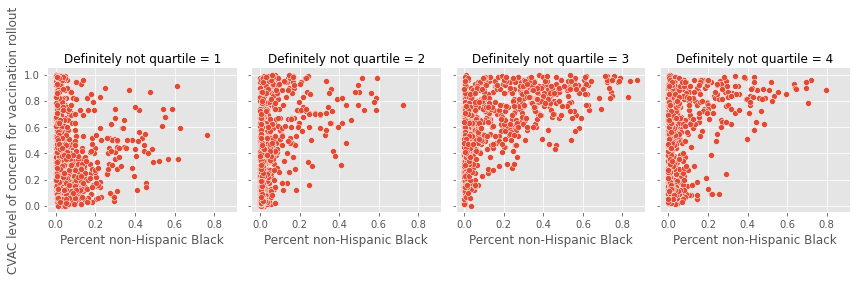

In [18]:
# Further splitting up the "strongly hesitant" quartile data for CVAC level of concern to clearly see the trends
g = sns.FacetGrid(vacc, col="Definitely not quartile")
g.map(sns.scatterplot, "Percent non-Hispanic Black", "CVAC level of concern for vaccination rollout")

### Splitting up non-Hispanic Black population in quartiles

In [12]:
vacc['Percent non-Hispanic Black'].describe()
# This shows 50% of the US counties have less than 2.2% non-Hispanic Black constituting their population make up.
#25% of the counties have more than ~10% non-Hispanic Black in their population.

count    3142.000000
mean        0.089259
std         0.144283
min         0.000000
25%         0.006500
50%         0.021900
75%         0.098400
max         0.872300
Name: Percent non-Hispanic Black, dtype: float64

In [70]:
#get quartiles of percent non-Hispanic Black population
q1, q2, q3 = vacc["Percent non-Hispanic Black"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the percent non-Hispanic Black pop in quartile bins to get an idea of composition of counties with respect to % Black pop. 
conditions =[\
    (vacc["Percent non-Hispanic Black"]<=q1),\
    (vacc["Percent non-Hispanic Black"]>q1) & (vacc["Percent non-Hispanic Black"]<=q2),\
    (vacc["Percent non-Hispanic Black"]>q2) & (vacc["Percent non-Hispanic Black"]<=q3),\
    (vacc["Percent non-Hispanic Black"]>q3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic Black quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic Black quartile', ylabel='CVAC level of concern for vaccination rollout'>

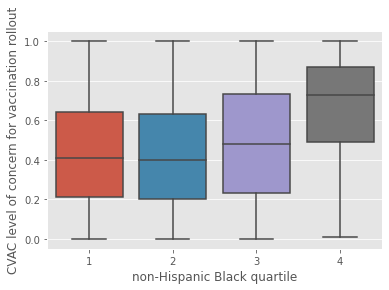

In [13]:
sns.boxplot(x='non-Hispanic Black quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
# this shows that in the first 2 quartile of black population, which is where our 50% counties reside, there is not much difference in the CVAc level of concern.
# However, in the 4th quartile of Black population where this ethnic group forms greater than 10% share of the population in respective counties,
# the CVAC level of concern is markedly different.

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='CVAC level of concern for vaccination rollout'>

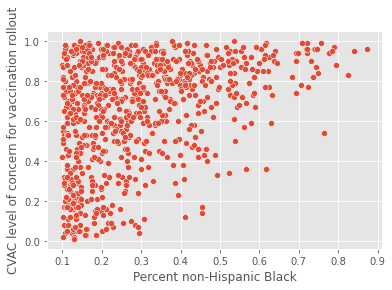

In [238]:
# Testing the scatter plot again to see if it has better clarity now
vacc_scatter = vacc.loc[vacc['Percent non-Hispanic Black']>0.1, :]
sns.scatterplot(x='Percent non-Hispanic Black', y = 'CVAC level of concern for vaccination rollout', data =vacc_scatter)

### Splitting up Hispanic population in quartiles

In [71]:
#get quartiles of percent Hispanic population
h1, h2, h3 = vacc["Percent Hispanic"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the percent Hispanic pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent Hispanic"]<=h1),\
    (vacc["Percent Hispanic"]>h1) & (vacc["Percent Hispanic"]<=h2),\
    (vacc["Percent Hispanic"]>h2) & (vacc["Percent Hispanic"]<=h3),\
    (vacc["Percent Hispanic"]>h3) 
            ]
values = [1, 2, 3, 4]
vacc['Hispanic quartile'] =np.select(conditions, values)

In [15]:
vacc['Percent Hispanic'].describe()

count    3142.000000
mean        0.094184
std         0.138647
min         0.000000
25%         0.022200
50%         0.042300
75%         0.096800
max         0.991700
Name: Percent Hispanic, dtype: float64

<AxesSubplot:xlabel='Hispanic quartile', ylabel='CVAC level of concern for vaccination rollout'>

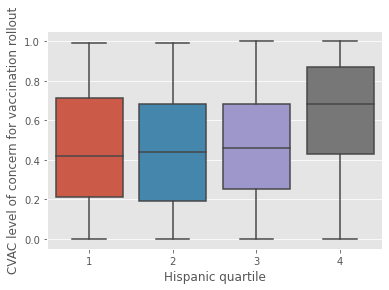

In [16]:
sns.boxplot(x='Hispanic quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

### Splitting up non-Hispanic Asians in quartiles

In [72]:
#get quartiles of percent non-Hispanic Asian population
a1, a2, a3 = vacc["Percent non-Hispanic Asian"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the percent non-Hispanic Asian pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic Asian"]<=a1),\
    (vacc["Percent non-Hispanic Asian"]>a1) & (vacc["Percent non-Hispanic Asian"]<=a2),\
    (vacc["Percent non-Hispanic Asian"]>a2) & (vacc["Percent non-Hispanic Asian"]<=a3),\
    (vacc["Percent non-Hispanic Asian"]>a3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic Asian quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic Asian quartile', ylabel='CVAC level of concern for vaccination rollout'>

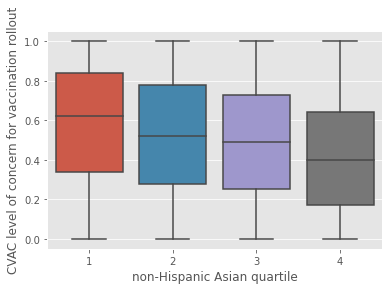

In [18]:
sns.boxplot(x='non-Hispanic Asian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [19]:
vacc['Percent non-Hispanic Asian'].describe()

count    3142.000000
mean        0.013621
std         0.027665
min         0.000000
25%         0.002800
50%         0.006100
75%         0.012800
max         0.417300
Name: Percent non-Hispanic Asian, dtype: float64

### Splitting up non-Hispanic Indian population in quartiles

In [73]:
#get quartiles of percent non-Hispanic American Indian/Alaska Native population
ai1, ai2, ai3 = vacc["Percent non-Hispanic American Indian/Alaska Native"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the non-Hispanic American Indian/Alaska Native pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]<=ai1),\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]>ai1) & (vacc["Percent non-Hispanic American Indian/Alaska Native"]<=ai2),\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]>ai2) & (vacc["Percent non-Hispanic American Indian/Alaska Native"]<=ai3),\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]>ai3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic American Indian quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic American Indian quartile', ylabel='CVAC level of concern for vaccination rollout'>

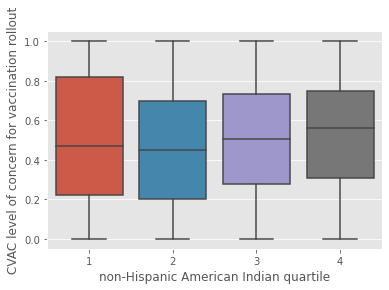

In [21]:
sns.boxplot(x='non-Hispanic American Indian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [41]:
vacc['Percent non-Hispanic American Indian/Alaska Native'].describe()

count    3142.000000
mean        0.018463
std         0.076340
min         0.000000
25%         0.001200
50%         0.002800
75%         0.006900
max         0.919000
Name: Percent non-Hispanic American Indian/Alaska Native, dtype: float64

### Splitting up non-Hispanic Hawaiian population in quartiles

In [74]:
#get quartiles of Percent non-Hispanic Native Hawaiian/Pacific Islander population
nh1, nh2, nh3 = vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the Percent non-Hispanic Native Hawaiian/Pacific Islander pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]<=nh1),\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]>nh1) & (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]<=nh2),\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]>nh2) & (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]<=nh3),\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]>nh3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic Native Hawaiian quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic Native Hawaiian quartile', ylabel='CVAC level of concern for vaccination rollout'>

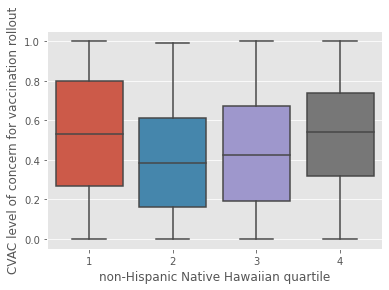

In [23]:
sns.boxplot(x='non-Hispanic Native Hawaiian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [24]:
vacc['Percent non-Hispanic Native Hawaiian/Pacific Islander'].describe()

count    3142.000000
mean        0.000919
std         0.006240
min         0.000000
25%         0.000000
50%         0.000100
75%         0.000600
max         0.272700
Name: Percent non-Hispanic Native Hawaiian/Pacific Islander, dtype: float64

### Splitting up non-Hispanic Whites in quartiles

In [75]:
#get quartiles of Percent non-Hispanic White population
w1, w2, w3 = vacc["Percent non-Hispanic White"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the Percent non-Hispanic White pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic White"]<=w1),\
    (vacc["Percent non-Hispanic White"]>w1) & (vacc["Percent non-Hispanic White"]<=w2),\
    (vacc["Percent non-Hispanic White"]>w2) & (vacc["Percent non-Hispanic White"]<=w3),\
    (vacc["Percent non-Hispanic White"]>w3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic White quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic White quartile', ylabel='CVAC level of concern for vaccination rollout'>

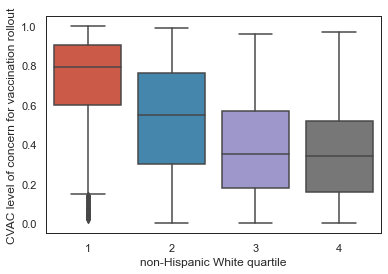

In [76]:
sns.boxplot(x='non-Hispanic White quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [47]:
vacc['Percent non-Hispanic White'].describe()

count    3142.000000
mean        0.762499
std         0.202157
min         0.006900
25%         0.644450
50%         0.837400
75%         0.924875
max         1.000000
Name: Percent non-Hispanic White, dtype: float64

### Plotting CVAC by Ethnicity Distribution

Text(0.5, 1.0, 'Native Hawaiian')

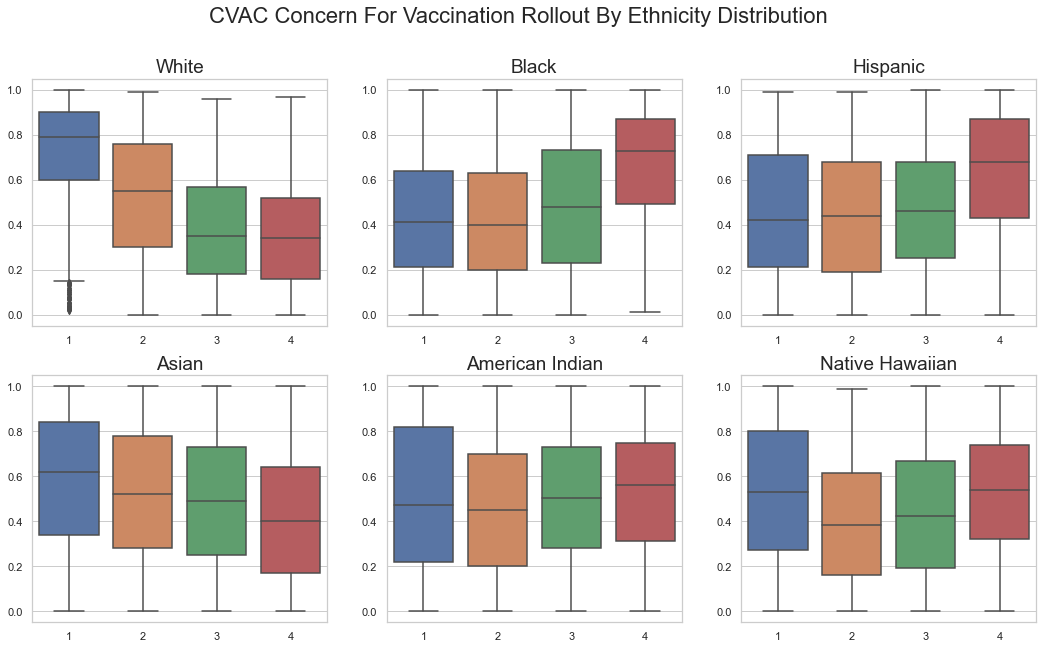

In [282]:
# All 6 boxplots created as subplots for comparison
fig, axes = plt.subplots(2,3, figsize =(18,10), sharey = False)
fig.suptitle('CVAC Concern For Vaccination Rollout By Ethnicity Distribution', fontsize =22)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)

sns.boxplot(ax =axes[0,0], x='non-Hispanic White quartile', y='CVAC level of concern for vaccination rollout', data=vacc, palette ='deep').set(ylabel = None, xlabel = None)
axes[0,0].set_title('White', fontsize = 19)
sns.boxplot(ax =axes[0,1], x='non-Hispanic Black quartile', y='CVAC level of concern for vaccination rollout', data=vacc, palette ='deep').set(ylabel = None, xlabel = None)
axes[0,1].set_title('Black', fontsize = 19)
sns.boxplot(ax =axes[0,2], x='Hispanic quartile', y='CVAC level of concern for vaccination rollout', data=vacc, palette ='deep').set(ylabel = None, xlabel = None)
axes[0,2].set_title('Hispanic', fontsize = 19)
sns.boxplot(ax =axes[1,0], x='non-Hispanic Asian quartile', y='CVAC level of concern for vaccination rollout', data=vacc, palette ='deep').set(ylabel = None, xlabel = None)
axes[1,0].set_title('Asian', fontsize = 19)
sns.boxplot(ax =axes[1,1], x='non-Hispanic American Indian quartile', y='CVAC level of concern for vaccination rollout', data=vacc, palette ='deep').set(ylabel = None, xlabel = None)
axes[1,1].set_title('American Indian', fontsize = 19)
sns.boxplot(ax =axes[1,2], x='non-Hispanic Native Hawaiian quartile', y='CVAC level of concern for vaccination rollout', data=vacc, palette ='deep').set(ylabel = None, xlabel = None)
axes[1,2].set_title('Native Hawaiian', fontsize = 19)

### Changes made in the dataframe upto this point saved in a new file

In [116]:
vacc.to_csv("Vaccine_Hesitance_2.csv", index= False)

#### Created a dataframe table to compare median CVACs for quartiles of different ethnicities

In [85]:
#Created a dataframe/table to compare median CVACs of 4 quartiles of different ethnicities
med_cvac = pd.DataFrame([["non-Hispanic White", 0.64, 0.79, 0.84, 0.55, 0.92, 0.35, 1.0, 0.34], ["non-Hispanic Black",\
                  0.0065, 0.41, 0.022, 0.4, 0.098, 0.5, 0.87, 0.74], ["Hispanic", 0.022, 0.41, 0.042, 0.42, 0.096, 0.44, 0.99, 0.68],\
                   ["non-Hispanic Asian", 0.0028, 0.62, 0.006, 0.52, 0.013, 0.5, 0.42, 0.4], ["non-Hispanic American Indian", 0.0012, 0.48, 0.0028, 0.45, 0.007, 0.50, 0.92, 0.55],\
                   ["non-Hispanic Native Hawaiian", 0.0, 0.52, 0.0001, 0.39, 0.0006, 0.41, 0.27, 0.52]], columns =\
                   ['Ethnicity','25%Q', 'Median CVAC', '50%Q', 'Median CVAC', '75%Q', 'Median CVAC', 'Max', 'Median CVAC'])                                               

In [90]:
med_cvac

,25%Q,Median CVAC,50%Q,Median CVAC,75%Q,Median CVAC,Max,Median CVAC
Ethnicity,,,,,,,,
non-Hispanic White,0.6400,0.79,0.8400,0.55,0.9200,0.35,1.00,0.34
non-Hispanic Black,0.0065,0.41,0.0220,0.40,0.0980,0.50,0.87,0.74
Hispanic,0.0220,0.41,0.0420,0.42,0.0960,0.44,0.99,0.68
non-Hispanic Asian,0.0028,0.62,0.0060,0.52,0.0130,0.50,0.42,0.40
non-Hispanic American Indian,0.0012,0.48,0.0028,0.45,0.0070,0.50,0.92,0.55
non-Hispanic Native Hawaiian,0.0000,0.52,0.0001,0.39,0.0006,0.41,0.27,0.52


#### Read a new file into vacc2 dataframe

In [3]:
#Reading the file from new csv created above containing quartile columns and "probably not" and "unsure" columns
vacc2=pd.read_csv("Vaccine_Hesitance_2.csv")

In [285]:
#vacc2.head()
#vacc2 = vacc2.set_index("FIPS Code")

In [239]:
#vacc2.loc[vacc2['non-Hispanic White quartile'] == 3]

In [240]:
#temp_vacc2 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 4) & (vacc2['non-Hispanic Black quartile']== 1), :]
#temp_vacc2

In [241]:
#temp_vacc2 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 4) & (vacc2['non-Hispanic Black quartile']== 4), :]
#temp_vacc2

In [242]:
#temp_vacc2 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 4) & (vacc2['Hispanic quartile']== 1), :]
#temp_vacc2

In [243]:
#temp_vacc2 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 1) & (vacc2['Hispanic quartile']== 3), :]
#temp_vacc2

In [244]:
#temp_vacc2 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 1) & (vacc2['Hispanic quartile']== 2), :]
#temp_vacc2

In [245]:
#temp_vacc2 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 1) & (vacc2['non-Hispanic Black quartile']== 1), :]
#temp_vacc2

In [286]:
# Intended to get all those counties that comprises of 1st quartile white population & 4th quartile black pop to figure out high CVAC concern shown by 1st quartile of whites  
temp_vacc3 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 1) & (vacc2['non-Hispanic Black quartile']== 4), :]
temp_vacc3 = temp_vacc3.iloc[:, 0:17]
#temp_vacc3.head()

In [210]:
#Counted the rows obtained from above for different states
temp_vacc3=temp_vacc3['State'].value_counts()
temp_vacc3

GEORGIA                 84
MISSISSIPPI             54
VIRGINIA                45
NORTH CAROLINA          43
TEXAS                   40
LOUISIANA               34
SOUTH CAROLINA          29
ALABAMA                 26
ARKANSAS                20
FLORIDA                 19
MARYLAND                 9
NEW JERSEY               8
NEW YORK                 8
TENNESSEE                7
OKLAHOMA                 6
ILLINOIS                 5
CONNECTICUT              3
DELAWARE                 2
OHIO                     2
MISSOURI                 2
INDIANA                  2
CALIFORNIA               2
KANSAS                   2
DISTRICT OF COLUMBIA     1
MINNESOTA                1
MICHIGAN                 1
PENNSYLVANIA             1
MASSACHUSETTS            1
NEVADA                   1
COLORADO                 1
WISCONSIN                1
Name: State, dtype: int64

<AxesSubplot:xlabel='CVAC Level Of Concern', ylabel='Percent non-Hispanic White'>

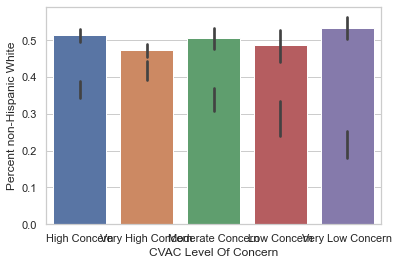

In [12]:
sns.set_theme(style="whitegrid")
sns.barplot(x="CVAC Level Of Concern", y="Percent non-Hispanic Black", data=temp_vacc3)
sns.barplot(x="CVAC Level Of Concern", y= 'Percent non-Hispanic White', data=temp_vacc3)


In [ ]:
temp_vacc_ga = temp_vacc3.loc[temp_vacc3['State'] == 'GEORGIA']
temp_vacc_ga

<AxesSubplot:xlabel='Estimated strongly hesitant', ylabel='CVAC level of concern for vaccination rollout'>

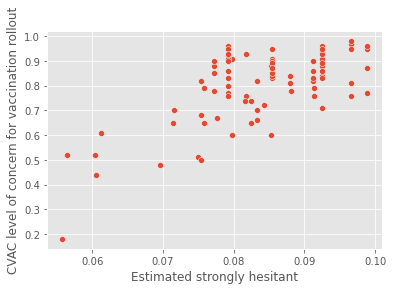

In [11]:
sns.scatterplot(x='Estimated strongly hesitant', y= 'CVAC level of concern for vaccination rollout', data =temp_vacc_ga)

In [13]:
vacc2_w1 = vacc2.loc[vacc2['non-Hispanic White quartile'] == 1]

<AxesSubplot:xlabel='Percent non-Hispanic White', ylabel='Estimated strongly hesitant'>

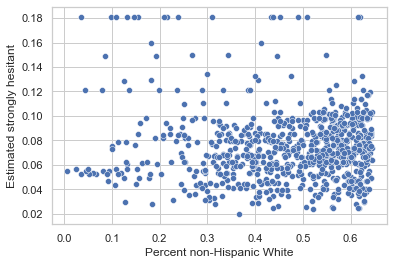

In [14]:
sns.scatterplot(x='Percent non-Hispanic White', y= 'Estimated strongly hesitant', data =vacc2_w1)

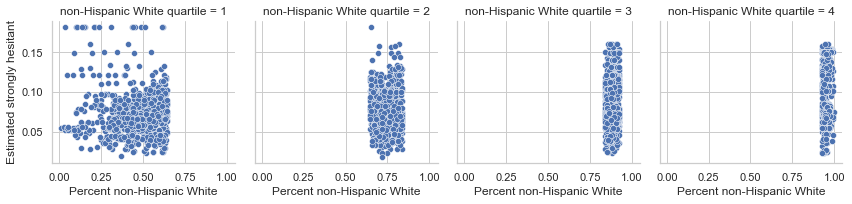

In [15]:
g = sns.FacetGrid(vacc2, col="non-Hispanic White quartile")
g.map(sns.scatterplot, "Percent non-Hispanic White", "Estimated strongly hesitant", data = vacc2)
# Here, it would be good to investigate counties in 3rd and 4th quartile that have white pop > 84% and where >10% pop is strongly hesitant

In [287]:
temp_vacc4 = vacc2.loc[(vacc2['non-Hispanic White quartile'] == 4) & (vacc2['non-Hispanic Black quartile']== 1), :]
#temp_vacc4

In [212]:
temp_vacc4['State'].value_counts()

NEBRASKA         44
MISSOURI         38
IOWA             34
INDIANA          28
MICHIGAN         25
MONTANA          24
MINNESOTA        21
KENTUCKY         20
SOUTH DAKOTA     20
ILLINOIS         19
KANSAS           17
WISCONSIN        17
NORTH DAKOTA     17
WEST VIRGINIA    14
TENNESSEE        13
OHIO             11
ARKANSAS         10
PENNSYLVANIA      8
MAINE             7
IDAHO             6
VIRGINIA          5
NEW HAMPSHIRE     3
WYOMING           3
VERMONT           3
GEORGIA           2
UTAH              2
COLORADO          1
OREGON            1
NEW YORK          1
Name: State, dtype: int64

### Read cvac_theme.csv file and merged the cvac_theme dataframe with vacc2 df on FIPS code

In [24]:
# Want to scatter plot each quartile of population against 5 big CVAC themes: First read the theme file and merge with vacc dataframe
# cvac_theme = pd.read_csv("County_CVAC_data_Feb2021.csv")
# cvac_theme =cvac_theme.rename(columns ={'FIPS':'FIPS Code','state': 'State', 'county':'County Name'})
# cvac_theme = cvac_theme.set_index('FIPS Code')
# vacc2_cvac = pd.merge(vacc2, cvac_theme, on = 'FIPS Code')
# vacc2_cvac =vacc2_cvac.set_index("FIPS Code")
vacc2_cvac.head()

,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,...,non-Hispanic Native Hawaiian quartile,non-Hispanic White quartile,State_y,County Name_y,Th1_Historic_Undervaccination,Th2_Sociodemographic_Barriers,Th3_Resource_constrained_Healthcare_System,Th4_Healthcare_Accessibility_Barriers,Th5_Irregular_Care_Seeking_Behavior,CVAC
FIPS Code,,,,,,,,,,,,,,,,,,,,,
1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,0.324,...,4,2,Alabama,Lawrence County,0.321872,0.810252,0.738618,0.774912,0.785100,0.797517
1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,0.294,...,3,1,Alabama,Pickens County,0.417383,0.871379,0.439669,0.936644,0.699140,0.782553
1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,0.289,...,1,1,Alabama,Conecuh County,0.524674,0.917224,0.764406,0.908309,0.671442,0.886979
4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,0.340,...,4,1,Arizona,Pinal County,0.993951,0.406240,0.939828,0.377587,0.990767,0.865648
1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,0.311,...,4,2,Alabama,Henry County,0.430436,0.412926,0.683859,0.834448,0.583890,0.654250


#### Dropped the repeat state and county name columns and renamed other columns

In [ ]:
#vacc2_cvac.drop(['County Name_y', 'State_y'], axis =1, inplace =True)
#vacc2_cvac.rename(columns = {'County Name_x': 'County Name', 'State_x':'State'}, inplace =True)
#vacc2_cvac.head()

#### Wrote the new dataframe vacc2_cvac to vacc2_cvac.csv file

In [27]:
vacc2_cvac.to_csv("vacc2_cvac.csv")

In [34]:
vacc2_cvac = pd.read_csv("vacc2_cvac.csv")

In [28]:
vacc2_cvac_b1 = vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4, :]

### BLACK POPULATION DENSITY AGAINST DIFFERENT CVAC THEMES

Text(0, 0.5, 'Density')

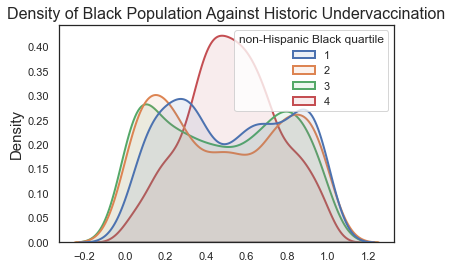

In [127]:
sns.set_theme(style="white")
#fig, axes = plt.subplots(1,4, figsize =(18,10), sharey = True)

# fig.suptitle('CVAC Concern By Ethnicity Distribution', fontsize =20)

# sns.histplot(ax=axes[0], x='Th1_Historic_Undervaccination', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==1, :])
# sns.histplot(ax=axes[1], x='Th1_Historic_Undervaccination', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==2, :])
# sns.histplot(ax=axes[2], x='Th1_Historic_Undervaccination', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==3, :])
# sns.histplot(ax=axes[3], x='Th1_Historic_Undervaccination', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4, :])

bq=sns.kdeplot(x='Th1_Historic_Undervaccination', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep")
plt.title('Density of Black Population Against Historic Undervaccination', fontsize = 16)
bq.set(xlabel = None)
plt.ylabel('Density',fontsize=15)

No handles with labels found to put in legend.


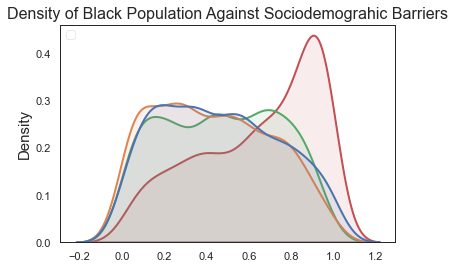

In [120]:
# fig, axes = plt.subplots(1,4, figsize =(18,10), sharey = True)
# fig.suptitle('Density of Black Population Counties Against Sociodemograhic Barriers', fontsize =20)
bq=sns.kdeplot(x='Th2_Sociodemographic_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep")
plt.title('Density of Black Population Against Sociodemograhic Barriers', fontsize = 16)
bq.set(xlabel = None)
plt.ylabel('Density',fontsize=15)
plt.legend(loc="upper left")
#axes.legend(loc='upper left')
# sns.kdeplot(ax=axes[0], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==1, :])
# sns.kdeplot(ax=axes[1], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==2, :])
# sns.kdeplot(ax=axes[2], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==3, :])
# sns.kdeplot(ax=axes[3], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4, :])

In [ ]:
vacc2_cvac = vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4]
vacc2_cvac['State'].value_counts()

Text(0, 0.5, 'Density')

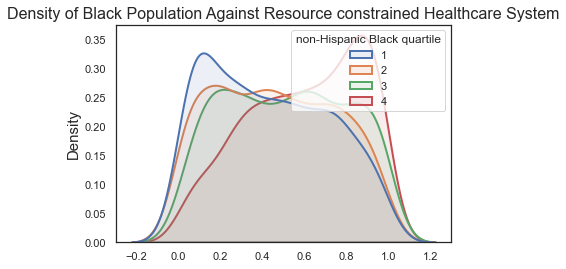

In [128]:
#fig, axes = plt.subplots(1,4, figsize =(18,10), sharey = True)
# fig.suptitle('CVAC Concern By Ethnicity Distribution', fontsize =20)

# sns.kdeplot(ax=axes[0], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==1, :])
# sns.kdeplot(ax=axes[1], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==2, :])
# sns.kdeplot(ax=axes[2], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==3, :])
# sns.kdeplot(ax=axes[3], x='Th3_Resource_constrained_Healthcare_System', bw_adjust =0.5, data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4, :])

bq=sns.kdeplot(x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep")
plt.title('Density of Black Population Against Resource constrained Healthcare System', fontsize = 16)
bq.set(xlabel = None)
plt.ylabel('Density',fontsize=15)
#plt.legend(loc="upper left")

Text(0, 0.5, 'Density')

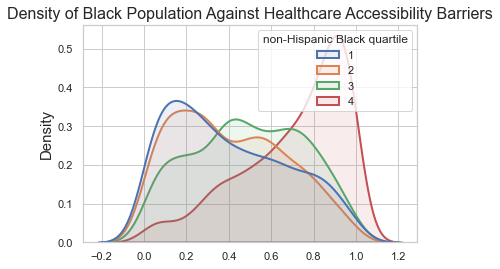

In [124]:
#fig, axes = plt.subplots(1,4, figsize =(18,10), sharey = True)
# fig.suptitle('CVAC Concern By Ethnicity Distribution', fontsize =20)

# sns.histplot(ax=axes[0], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==1, :])
# sns.histplot(ax=axes[1], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==2, :])
# sns.histplot(ax=axes[2], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==3, :])
# sns.histplot(ax=axes[3], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4, :])

bq=sns.kdeplot(x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep")
plt.title('Density of Black Population Against Healthcare Accessibility Barriers', fontsize = 16)
bq.set(xlabel = None)
plt.ylabel('Density',fontsize=15)

Text(0, 0.5, 'Density')

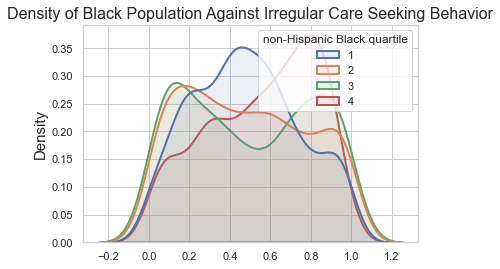

In [126]:
#fig, axes = plt.subplots(1,4, figsize =(18,10), sharey = True)
# fig.suptitle('CVAC Concern By Ethnicity Distribution', fontsize =20)

# sns.kdeplot(ax=axes[0], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==1, :])
# sns.kdeplot(ax=axes[1], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==2, :])
# sns.kdeplot(ax=axes[2], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==3, :])
# sns.kdeplot(ax=axes[3], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac.loc[vacc2_cvac['non-Hispanic Black quartile']==4, :])

bq=sns.kdeplot(x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep")
plt.title('Density of Black Population Against Irregular Care Seeking Behavior', fontsize = 16)
bq.set(xlabel = None)
plt.ylabel('Density',fontsize=15)

[Text(0.5, 0, 'Irregular Care seking Behavior')]

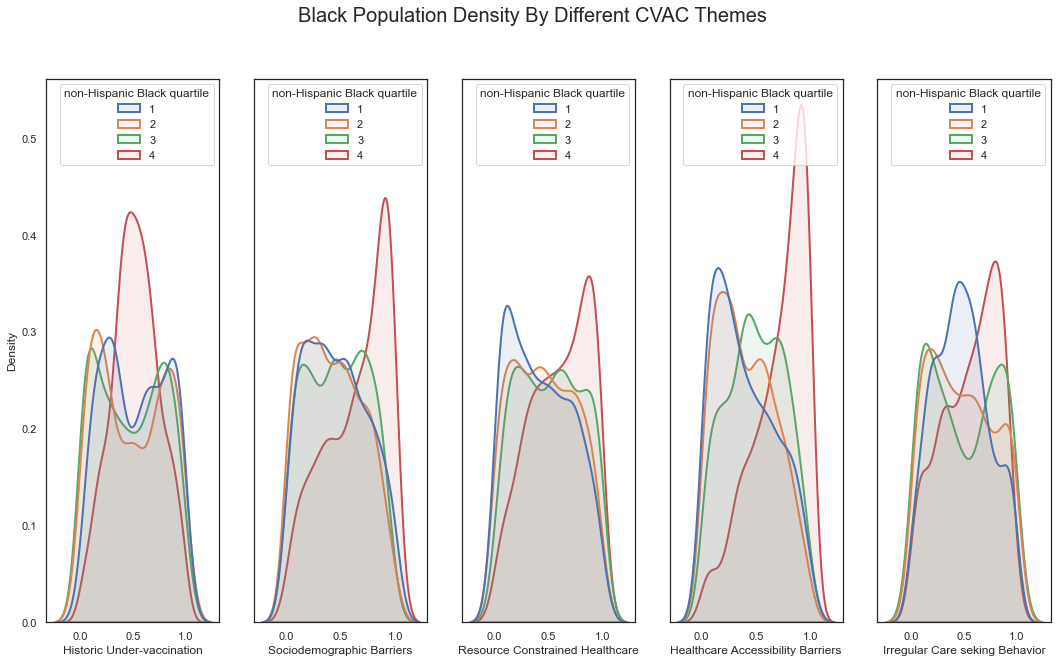

In [142]:
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Black Population Density By Different CVAC Themes', fontsize =20)

sns.kdeplot(ax=axes[0], x='Th1_Historic_Undervaccination', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep").set(xlabel = "Historic Under-vaccination")
#axes.set_xlabel(size =12)
#plt.ylabel('Density',fontsize=15)
sns.kdeplot(ax=axes[1], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep").set(xlabel = "Sociodemographic Barriers")
sns.kdeplot(ax=axes[2], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep").set(xlabel = "Resource Constrained Healthcare")
sns.kdeplot(ax=axes[3], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep").set(xlabel = "Healthcare Accessibility Barriers")
sns.kdeplot(ax=axes[4], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep").set(xlabel = "Irregular Care seking Behavior")

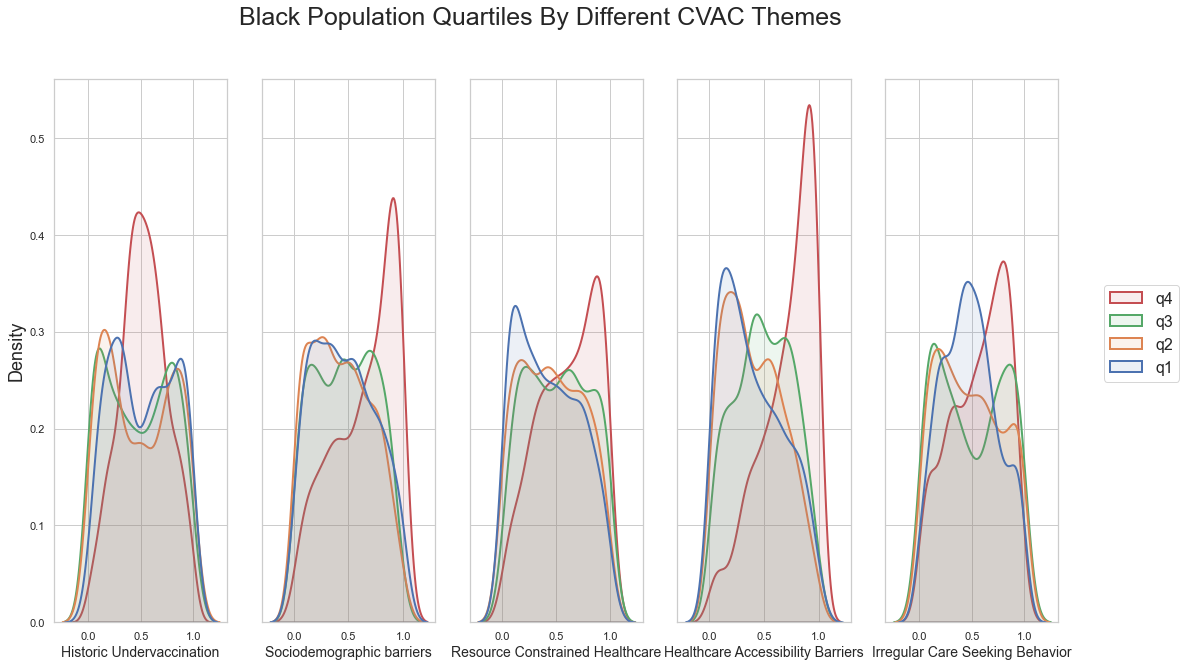

In [314]:
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Black Population Quartiles By Different CVAC Themes', fontsize =25)
line_labels = ["q4", "q3", "q2","q1"]
sns.kdeplot(ax=axes[0], x='Th1_Historic_Undervaccination', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Historic Under-vaccination")
axes[0].set_xlabel('Historic Undervaccination', fontsize = 14)
axes[0].set_ylabel('Density', fontsize = 18)
sns.kdeplot(ax=axes[1], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Sociodemographic Barriers")
axes[1].set_xlabel('Sociodemographic barriers', fontsize = 14)
sns.kdeplot(ax=axes[2], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Resource Constrained Healthcare")
axes[2].set_xlabel('Resource Constrained Healthcare', fontsize = 14)
sns.kdeplot(ax=axes[3], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Healthcare Accessibility Barriers")
axes[3].set_xlabel('Healthcare Accessibility Barriers', fontsize = 14)
sns.kdeplot(ax=axes[4], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac, hue = 'non-Hispanic Black quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Irregular Care Seeking Behavior")
axes[4].set_xlabel('Irregular Care Seeking Behavior', fontsize = 14)
fig.legend(#handles=[p1[0],p2[0],p3[0],p4[0]],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
           title="",  # Title for the legend
           fontsize=16)
plt.show()

### HISPANIC POPULATION DENSITY BY DIFFERENT CVAC THEMES

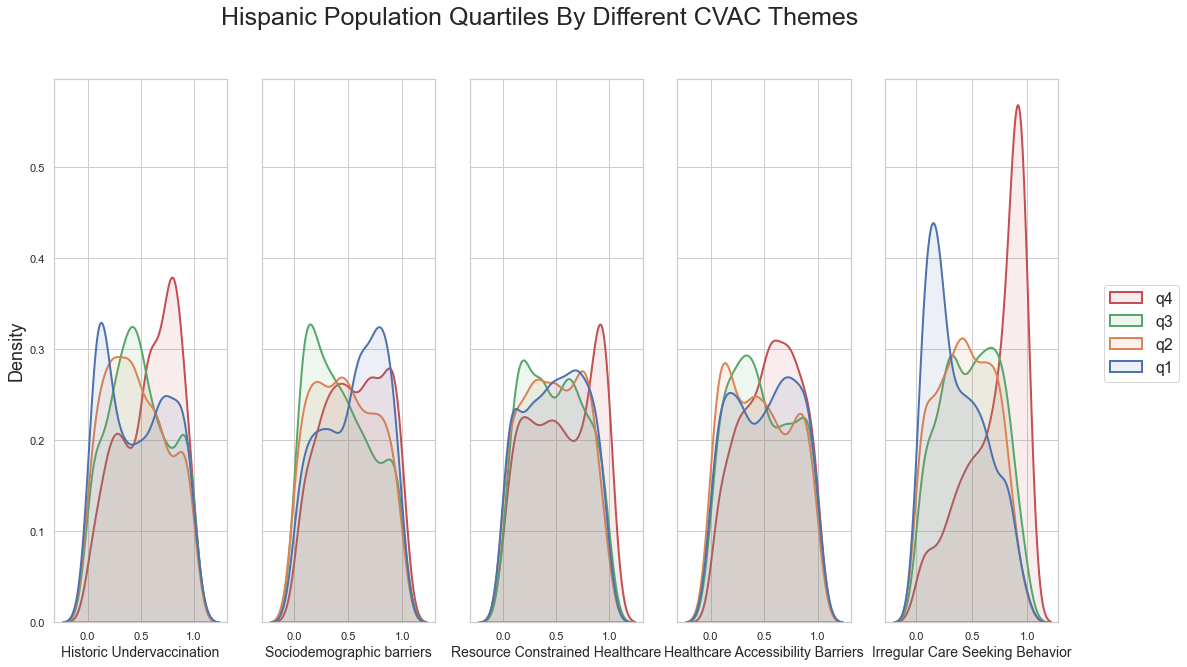

In [315]:
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Hispanic Population Quartiles By Different CVAC Themes', fontsize =25)
line_labels = ["q4", "q3", "q2","q1"]
sns.kdeplot(ax=axes[0], x='Th1_Historic_Undervaccination', data=vacc2_cvac, hue = 'Hispanic quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Historic Under-vaccination")
axes[0].set_xlabel('Historic Undervaccination', fontsize = 14)
axes[0].set_ylabel('Density', fontsize = 18)
sns.kdeplot(ax=axes[1], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac, hue = 'Hispanic quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Sociodemographic Barriers")
axes[1].set_xlabel('Sociodemographic barriers', fontsize = 14)
sns.kdeplot(ax=axes[2], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac, hue = 'Hispanic quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Resource Constrained Healthcare")
axes[2].set_xlabel('Resource Constrained Healthcare', fontsize = 14)
sns.kdeplot(ax=axes[3], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac, hue = 'Hispanic quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Healthcare Accessibility Barriers")
axes[3].set_xlabel('Healthcare Accessibility Barriers', fontsize = 14)
sns.kdeplot(ax=axes[4], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac, hue = 'Hispanic quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Irregular Care Seeking Behavior")
axes[4].set_xlabel('Irregular Care Seeking Behavior', fontsize = 14)
fig.legend(#handles=[p1[0],p2[0],p3[0],p4[0]],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
           title="",  # Title for the legend
           fontsize=16)
plt.show()

### WHITE POPULATION DENSITY BY DIFFERENT CVAC THEMES

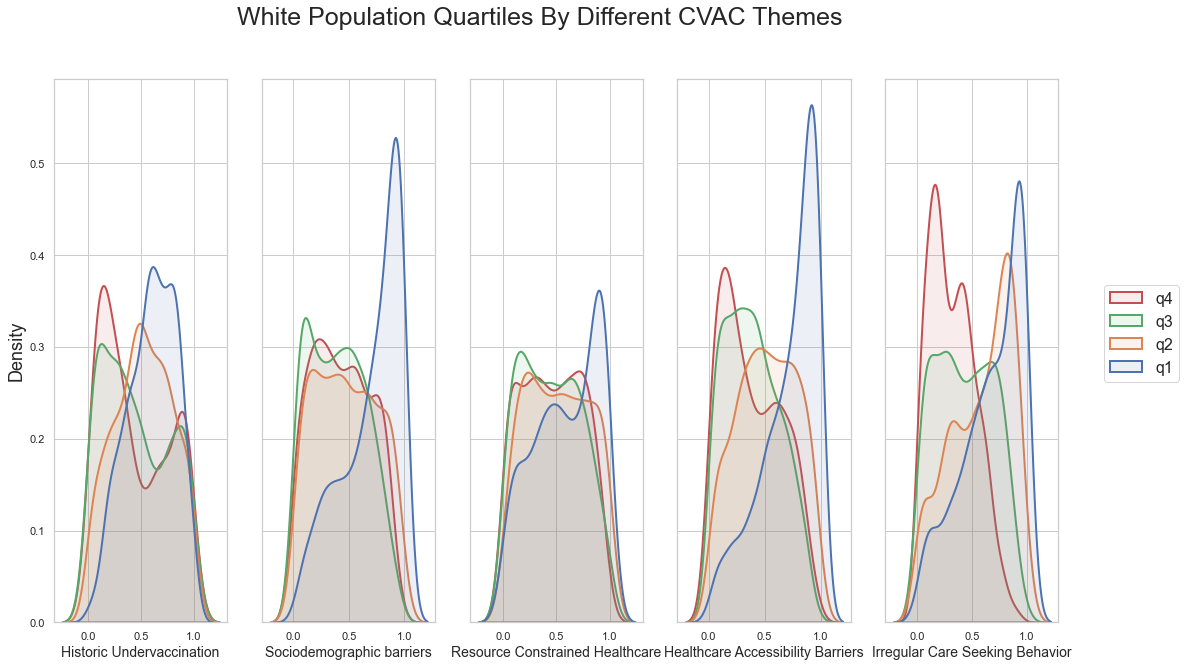

In [316]:
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('White Population Quartiles By Different CVAC Themes', fontsize =25)
line_labels = ["q4", "q3", "q2","q1"]
sns.kdeplot(ax=axes[0], x='Th1_Historic_Undervaccination', data=vacc2_cvac, hue = 'non-Hispanic White quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Historic Under-vaccination")
axes[0].set_xlabel('Historic Undervaccination', fontsize = 14)
axes[0].set_ylabel('Density', fontsize = 18)
sns.kdeplot(ax=axes[1], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac, hue = 'non-Hispanic White quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Sociodemographic Barriers")
axes[1].set_xlabel('Sociodemographic barriers', fontsize = 14)
sns.kdeplot(ax=axes[2], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac, hue = 'non-Hispanic White quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Resource Constrained Healthcare")
axes[2].set_xlabel('Resource Constrained Healthcare', fontsize = 14)
sns.kdeplot(ax=axes[3], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac, hue = 'non-Hispanic White quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Healthcare Accessibility Barriers")
axes[3].set_xlabel('Healthcare Accessibility Barriers', fontsize = 14)
sns.kdeplot(ax=axes[4], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac, hue = 'non-Hispanic White quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Irregular Care Seeking Behavior")
axes[4].set_xlabel('Irregular Care Seeking Behavior', fontsize = 14)
fig.legend(#handles=[p1[0],p2[0],p3[0],p4[0]],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
           title="",    # Title for the legend
           fontsize=16)
plt.show()

### ASIAN POPULATION DENSITY BY DIFFERENT CVAC THEMES

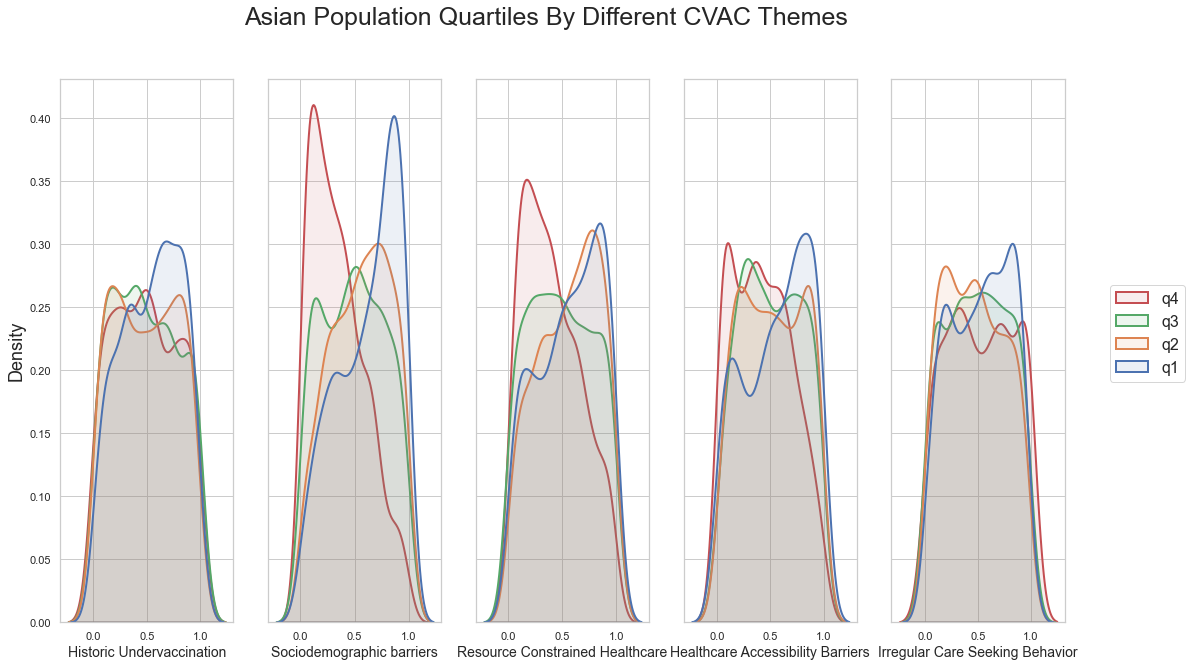

In [317]:
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Asian Population Quartiles By Different CVAC Themes', fontsize =25)
line_labels = ["q4", "q3", "q2","q1"]
sns.kdeplot(ax=axes[0], x='Th1_Historic_Undervaccination', data=vacc2_cvac, hue = 'non-Hispanic Asian quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Historic Under-vaccination")
axes[0].set_xlabel('Historic Undervaccination', fontsize = 14)
axes[0].set_ylabel('Density', fontsize = 18)
sns.kdeplot(ax=axes[1], x='Th2_Sociodemographic_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Asian quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Sociodemographic Barriers")
axes[1].set_xlabel('Sociodemographic barriers', fontsize = 14)
sns.kdeplot(ax=axes[2], x='Th3_Resource_constrained_Healthcare_System', data=vacc2_cvac, hue = 'non-Hispanic Asian quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Resource Constrained Healthcare")
axes[2].set_xlabel('Resource Constrained Healthcare', fontsize = 14)
sns.kdeplot(ax=axes[3], x='Th4_Healthcare_Accessibility_Barriers', data=vacc2_cvac, hue = 'non-Hispanic Asian quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Healthcare Accessibility Barriers")
axes[3].set_xlabel('Healthcare Accessibility Barriers', fontsize = 14)
sns.kdeplot(ax=axes[4], x='Th5_Irregular_Care_Seeking_Behavior', data=vacc2_cvac, hue = 'non-Hispanic Asian quartile', fill =True, alpha =0.1, linewidth=2, palette ="deep", legend = None).set(xlabel = "Irregular Care Seeking Behavior")
axes[4].set_xlabel('Irregular Care Seeking Behavior', fontsize = 14)
fig.legend(#handles=[p1[0],p2[0],p3[0],p4[0]],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
           title="" ,               # Title for the legend
        fontsize = 16
           )
plt.show()

### LOOKING AT PREDOMINANTLY BLACK POPULATED COUNTIES

In [234]:
vacc2_cvac_50b=vacc2_cvac.loc[vacc2_cvac['Percent non-Hispanic Black']>0.5]
#vacc2_cvac_70b.iloc[:,-7::-1]

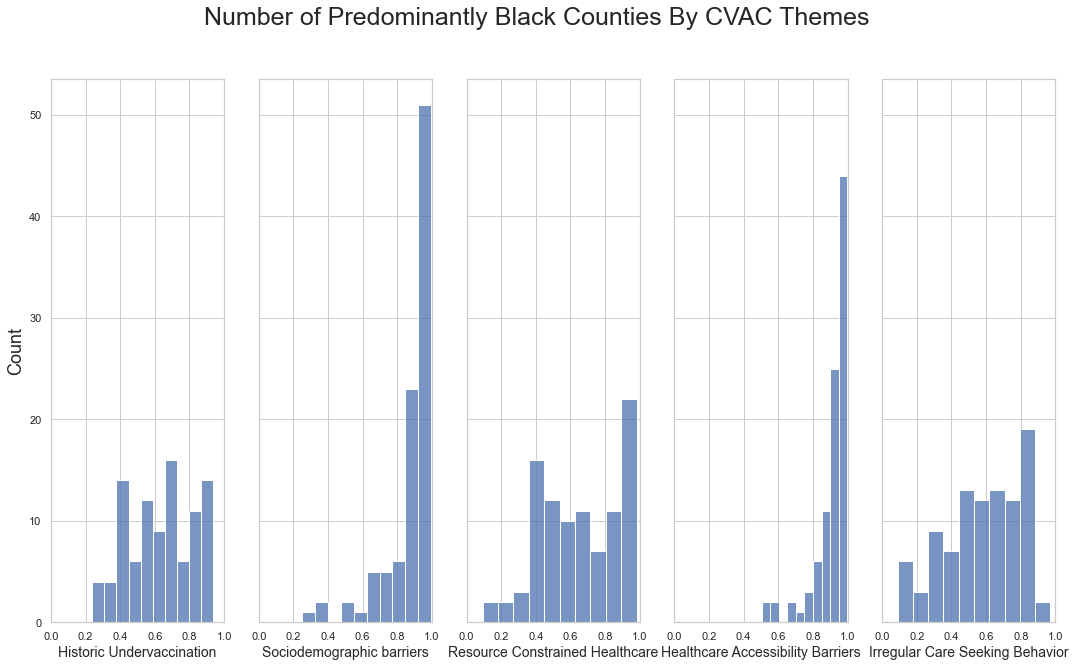

In [321]:
#sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Number of Predominantly Black Counties By CVAC Themes', fontsize =25)
sns.histplot(ax =axes[0], x="Th1_Historic_Undervaccination", data=vacc2_cvac_50b, bins = 10).set(xlabel = "Historic Under-vaccination")
axes[0].set_xlabel('Historic Undervaccination', fontsize = 14)
axes[0].set_ylabel('Count', fontsize = 18)
axes[0].set(xlim =(0,1))
sns.histplot(ax =axes[1], x="Th2_Sociodemographic_Barriers", data=vacc2_cvac_50b, bins = 10).set(xlabel = "Sociodemographic Barriers")
axes[1].set_xlabel('Sociodemographic barriers', fontsize = 14)
axes[1].set(xlim =(0,1))
sns.histplot(ax =axes[2], x="Th3_Resource_constrained_Healthcare_System", data=vacc2_cvac_50b, bins = 10).set(xlabel = "Resource Constrained Healthcare")
axes[2].set_xlabel('Resource Constrained Healthcare', fontsize = 14)
axes[2].set(xlim =(0,1))
sns.histplot(ax =axes[3], x="Th4_Healthcare_Accessibility_Barriers", data=vacc2_cvac_50b, bins = 10).set(xlabel = "Healthcare Accessibility Barriers")
axes[3].set_xlabel('Healthcare Accessibility Barriers', fontsize = 14)
axes[3].set(xlim =(0,1))
sns.histplot(ax =axes[4], x="Th5_Irregular_Care_Seeking_Behavior", data=vacc2_cvac_50b, bins = 10).set(xlabel = "Irregular Care Seeking Behavior")
axes[4].set_xlabel('Irregular Care Seeking Behavior', fontsize = 14)
axes[4].set(xlim =(0,1))
# axes.set(xlim=(0.0, 1.0))
plt.show()

In [247]:
#vacc2_cvac_50b["State"].value_counts()
vacc2_cvac_50b_states = vacc2_cvac_50b["State"].value_counts().rename_axis('States').reset_index(name='Number of Counties')
vacc2_cvac_50b_states.set_index('States')

,Number of Counties
States,
MISSISSIPPI,25
GEORGIA,21
ALABAMA,11
SOUTH CAROLINA,9
VIRGINIA,7
LOUISIANA,7
NORTH CAROLINA,6
ARKANSAS,5
TENNESSEE,2


In [243]:
vacc2_cvac_90w=vacc2_cvac.loc[(vacc2_cvac['Percent non-Hispanic White']>0.90) & (vacc2_cvac['State'].isin(['MISSISSIPPI','GEORGIA','ALABAMA','SOUTH CAROLINA','VIRGINIA','LOUISIANA','NORTH CAROLINA','ARKANSAS','TENNESSEE','MARYLAND','FLORIDA' ]))]                  
vacc2_cvac_90w['State'].value_counts()

TENNESSEE         46
VIRGINIA          23
ARKANSAS          20
GEORGIA           11
NORTH CAROLINA    10
ALABAMA            5
MISSISSIPPI        2
MARYLAND           1
Name: State, dtype: int64

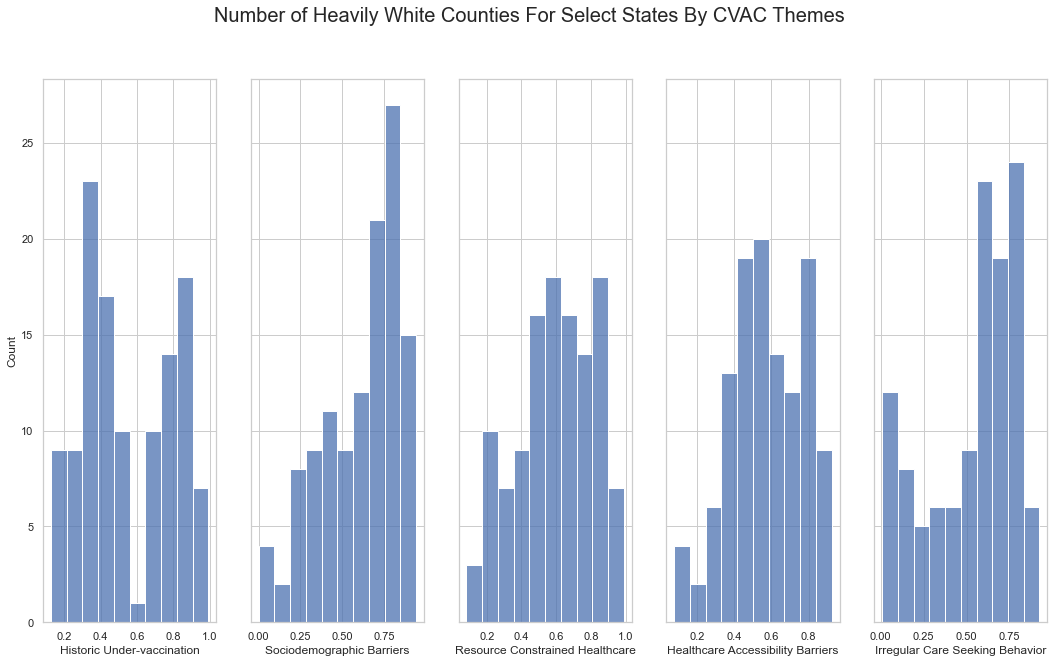

In [244]:
#sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Number of Heavily White Counties For Select States By CVAC Themes', fontsize =20)
sns.histplot(ax =axes[0], x="Th1_Historic_Undervaccination", data=vacc2_cvac_90w, bins = 10).set(xlabel = "Historic Under-vaccination")
sns.histplot(ax =axes[1], x="Th2_Sociodemographic_Barriers", data=vacc2_cvac_90w, bins = 10).set(xlabel = "Sociodemographic Barriers")
sns.histplot(ax =axes[2], x="Th3_Resource_constrained_Healthcare_System", data=vacc2_cvac_90w, bins = 10).set(xlabel = "Resource Constrained Healthcare")
sns.histplot(ax =axes[3], x="Th4_Healthcare_Accessibility_Barriers", data=vacc2_cvac_90w, bins = 10).set(xlabel = "Healthcare Accessibility Barriers")
sns.histplot(ax =axes[4], x="Th5_Irregular_Care_Seeking_Behavior", data=vacc2_cvac_90w, bins = 10).set(xlabel = "Irregular Care Seeking Behavior")
# axes.set(xlim=(0.0, 1.0))
plt.show()

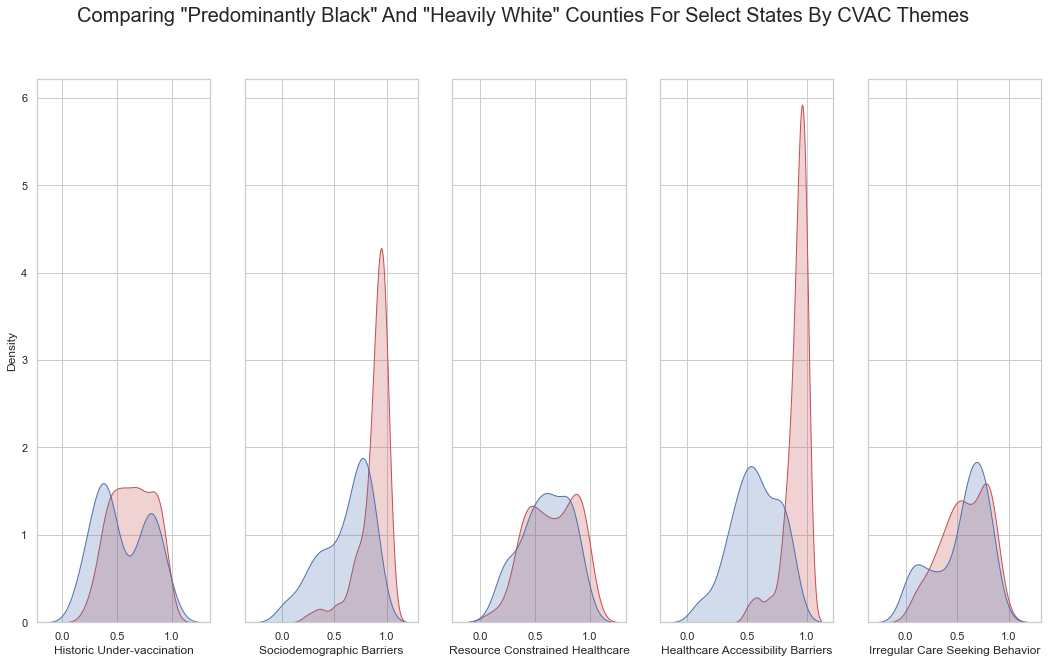

In [260]:
fig, axes = plt.subplots(1,5, figsize =(18,10), sharey = True)
fig.suptitle('Comparing "Predominantly Black" And "Heavily White" Counties For Select States By CVAC Themes', fontsize =20)
fig = sns.kdeplot(ax=axes[0],data=vacc2_cvac_50b['Th1_Historic_Undervaccination'], shade=True, color="r").set(xlabel = "Historic Under-vaccination")
fig = sns.kdeplot(ax=axes[0],data=vacc2_cvac_90w['Th1_Historic_Undervaccination'], shade=True, color="b").set(xlabel = "Historic Under-vaccination")
fig = sns.kdeplot(ax=axes[1],data=vacc2_cvac_50b['Th2_Sociodemographic_Barriers'], shade=True, color="r").set(xlabel = "Sociodemographic Barriers")
fig = sns.kdeplot(ax=axes[1],data=vacc2_cvac_90w['Th2_Sociodemographic_Barriers'], shade=True, color="b").set(xlabel = "Sociodemographic Barriers")
fig = sns.kdeplot(ax=axes[2],data=vacc2_cvac_50b['Th3_Resource_constrained_Healthcare_System'], shade=True, color="r").set(xlabel = "Resource Constrained Healthcare")
fig = sns.kdeplot(ax=axes[2],data=vacc2_cvac_90w['Th3_Resource_constrained_Healthcare_System'], shade=True, color="b").set(xlabel = "Resource Constrained Healthcare")
fig = sns.kdeplot(ax=axes[3],data=vacc2_cvac_50b['Th4_Healthcare_Accessibility_Barriers'], shade=True, color="r").set(xlabel = "Healthcare Accessibility Barriers")
fig = sns.kdeplot(ax=axes[3],data=vacc2_cvac_90w['Th4_Healthcare_Accessibility_Barriers'], shade=True, color="b").set(xlabel = "Healthcare Accessibility Barriers")
fig = sns.kdeplot(ax=axes[4],data=vacc2_cvac_50b['Th5_Irregular_Care_Seeking_Behavior'], shade=True, color="r").set(xlabel = "Irregular Care Seeking Behavior")
fig = sns.kdeplot(ax=axes[4],data=vacc2_cvac_90w['Th5_Irregular_Care_Seeking_Behavior'], shade=True, color="b").set(xlabel = "Irregular Care Seeking Behavior")
plt.show()

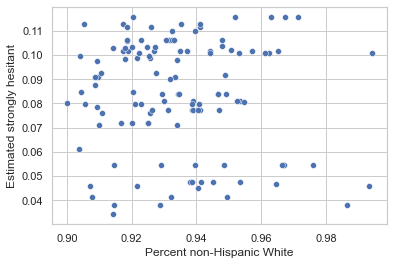

In [257]:
#sns.scatterplot(data=vacc2_cvac_50b, x="Percent non-Hispanic Black", y="Estimated strongly hesitant")
sns.scatterplot(data=vacc2_cvac_90w, x="Percent non-Hispanic White", y="Estimated strongly hesitant")
plt.show()

In [262]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [269]:
map_data = dict(type='choropleth',
            locations=['MS', 'GA', 'AL', 'SC', 'VA', 'LA', 'NC', 'AR','TN','MD', 'FL'],
            locationmode='USA-states',
            colorscale='Portland',
            text=['MISSISSIPPI', 'GEORGIA', 'ALABAMA', 'SOUTH CAROLINA', 'VIRGINIA','LOUISIANA', 'NORTH CAROLINA','ARKANSAS','TENNESSEE','MARYLAND', 'FLORIDA'],
            z=[1.0,2.0,3.0,4.0,5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0],
            colorbar=dict(title="USA States")
           )
map_layout = dict(geo = {'scope':'usa'})

In [270]:
map_actual = go.Figure(data=[map_data], layout=map_layout)

In [271]:
iplot(map_actual)

<AxesSubplot:xlabel='Th2_Sociodemographic_Barriers', ylabel='Th4_Healthcare_Accessibility_Barriers'>

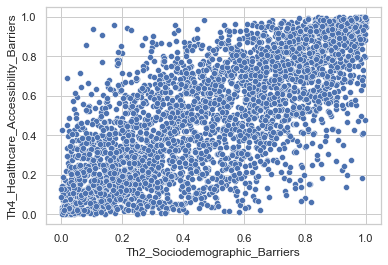

In [322]:
sns.scatterplot(data=vacc2_cvac, x="Th2_Sociodemographic_Barriers", y="Th4_Healthcare_Accessibility_Barriers")

<AxesSubplot:xlabel='Th2_Sociodemographic_Barriers', ylabel='Th4_Healthcare_Accessibility_Barriers'>

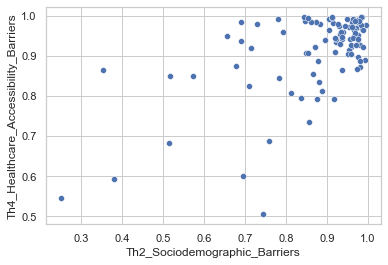

In [324]:
sns.scatterplot(data=vacc2_cvac_50b, x="Th2_Sociodemographic_Barriers", y="Th4_Healthcare_Accessibility_Barriers")

In [1]:
# for key, values in temp_vacc2:
#     print(key)
#     print(50*'-')
#     print(values)
#     print('\n')

<AxesSubplot:xlabel='Percent Hispanic', ylabel='Unsure'>

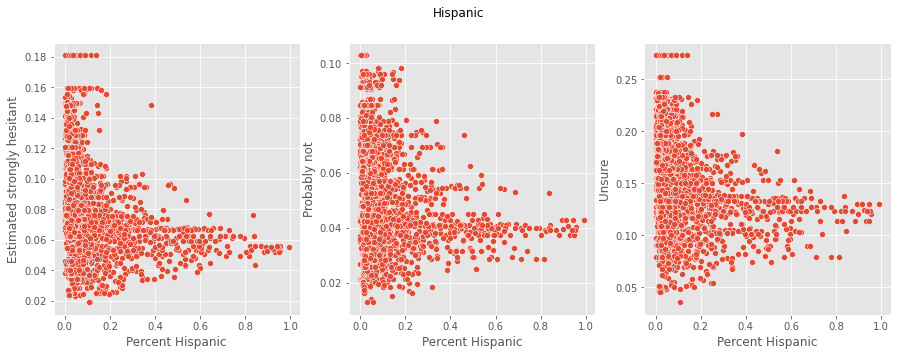

In [13]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('Hispanic')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent Hispanic", y="Estimated strongly hesitant")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent Hispanic", y="Probably not")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent Hispanic", y="Unsure")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Percent adults fully vaccinated against COVID-19'>

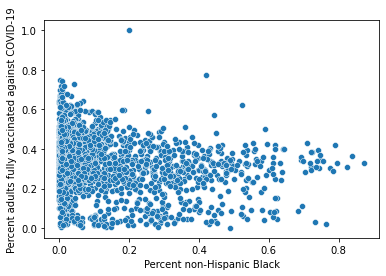

In [6]:
sns.scatterplot(data=vacc, x="Percent non-Hispanic Black", y="Percent adults fully vaccinated against COVID-19")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='CVAC level of concern for vaccination rollout'>

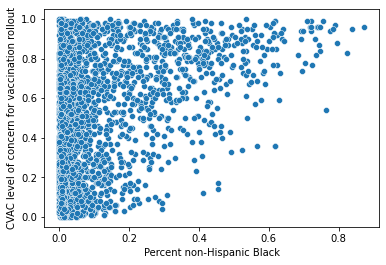

In [24]:
sns.scatterplot(data=vacc, x= "Percent non-Hispanic Black", y="CVAC level of concern for vaccination rollout")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Social Vulnerability Index (SVI)'>

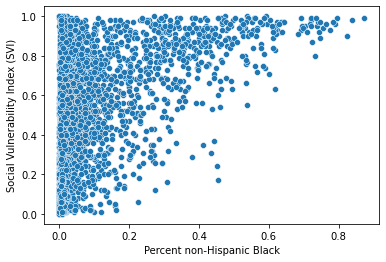

In [25]:
sns.scatterplot(data=vacc, x= "Percent non-Hispanic Black", y="Social Vulnerability Index (SVI)")

<AxesSubplot:xlabel='Percent Hispanic', ylabel='Percent adults fully vaccinated against COVID-19'>

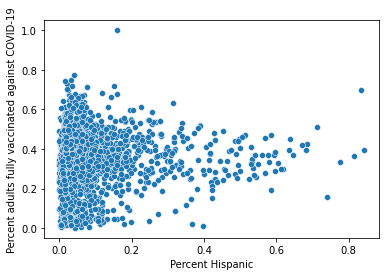

In [7]:
sns.scatterplot(data=vacc, x="Percent Hispanic", y="Percent adults fully vaccinated against COVID-19")

<AxesSubplot:xlabel='Percent non-Hispanic White', ylabel='Percent adults fully vaccinated against COVID-19'>

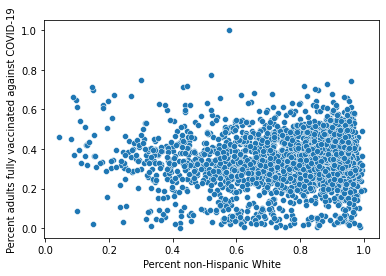

In [10]:
sns.scatterplot(data=vacc, x="Percent non-Hispanic White", y="Percent adults fully vaccinated against COVID-19")

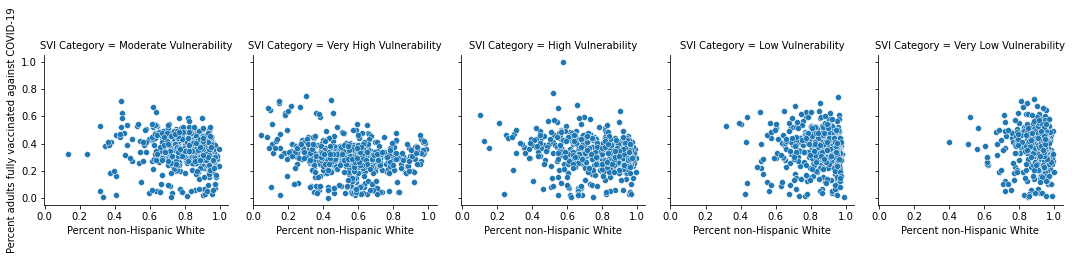

In [13]:
g = sns.FacetGrid(vacc, col="SVI Category")
g.map(sns.scatterplot, "Percent non-Hispanic White", "Percent adults fully vaccinated against COVID-19")

<AxesSubplot:xlabel='Percent non-Hispanic White', ylabel='Social Vulnerability Index (SVI)'>

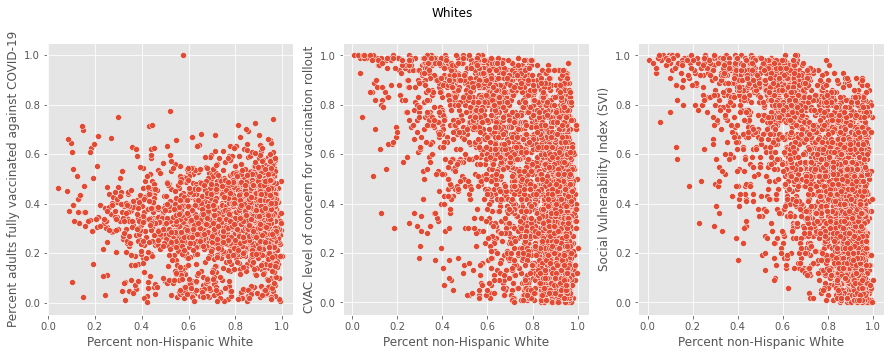

In [33]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('Whites')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic White", y="Percent adults fully vaccinated against COVID-19")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic White", y="CVAC level of concern for vaccination rollout")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic White", y="Social Vulnerability Index (SVI)")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Social Vulnerability Index (SVI)'>

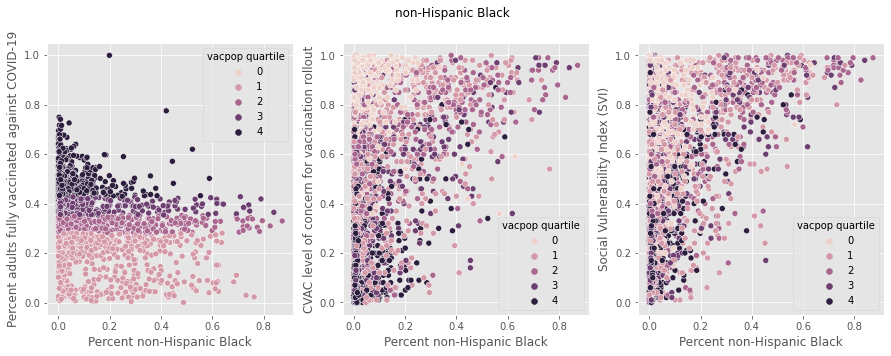

In [97]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('non-Hispanic Black')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic Black", y="Percent adults fully vaccinated against COVID-19", hue = "vacpop quartile")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic Black", y="CVAC level of concern for vaccination rollout", hue = "vacpop quartile")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic Black", y="Social Vulnerability Index (SVI)", hue = "vacpop quartile")

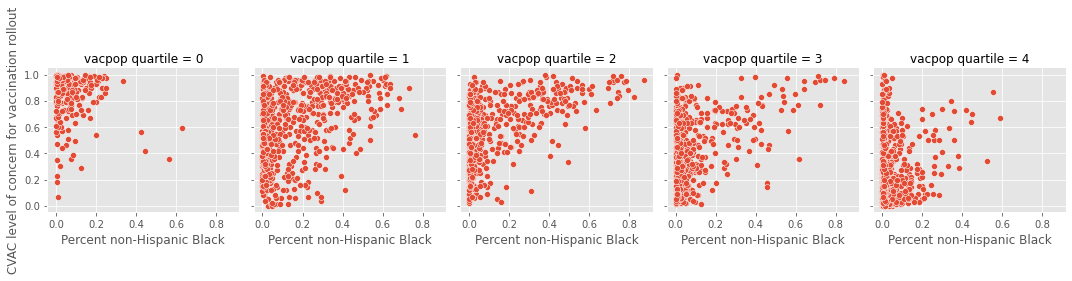

In [99]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent non-Hispanic Black", "CVAC level of concern for vaccination rollout")

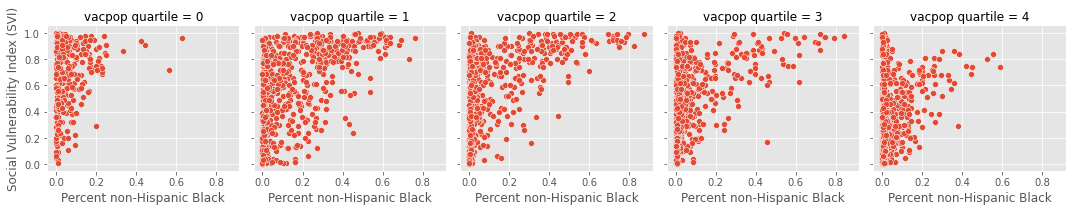

In [100]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent non-Hispanic Black", "Social Vulnerability Index (SVI)")

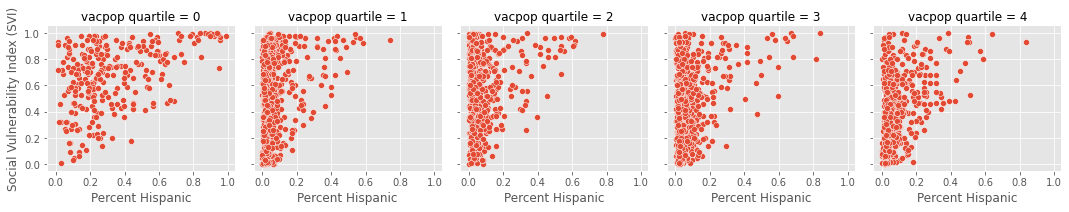

In [101]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent Hispanic", "Social Vulnerability Index (SVI)")

In [ ]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent Hispanic", "Social Vulnerability Index (SVI)")

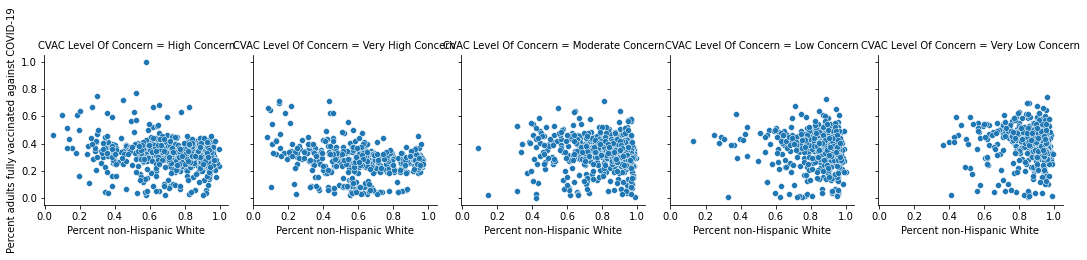

In [14]:
g = sns.FacetGrid(vacc, col="CVAC Level Of Concern")
g.map(sns.scatterplot, "Percent non-Hispanic White", "Percent adults fully vaccinated against COVID-19")

In [5]:
# h = sns.FacetGrid(vacc, col = "State")
# h.map(sns.scatterplot, "Percent non-Hispanic White", "Percent adults fully vaccinated against COVID-19")

In [15]:
vacc.rename(columns={'Estimated strongly hesitant':'Definitely Not'})

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Definitely Not,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,...,0.0219,0.0560,0.0020,0.1058,0.0008,0.7649,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.529795 34.518525, -87.5297...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,...,0.0487,0.0014,0.0006,0.3984,0.0006,0.5365,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.29705899999999 33.349083, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,...,0.0068,0.0020,0.0045,0.4776,0.0000,0.5005,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.165662 31.542897, -87.1653...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,...,0.3016,0.0430,0.0158,0.0408,0.0029,0.5679,POINT (-111.664616 34.293239),AZ,"MULTIPOLYGON (((-111.685911 33.204637, -111.61...",MULTIPOLYGON (((-114.516842 33.027885999999995...
4,1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,...,0.0262,0.0018,0.0040,0.2655,0.0010,0.6917,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.415774 31.490413, -85.4153...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55109,"St. Croix County, Wisconsin",WISCONSIN,0.0917,0.1380,0.0628,0.01,Very Low Vulnerability,0.09,Very Low Concern,...,0.0240,0.0019,0.0097,0.0080,0.0000,0.9391,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-92.792581 45.078793999999995,...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.0991,0.1530,0.0690,0.28,Low Vulnerability,0.31,Low Concern,...,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3139,55087,"Outagamie County, Wisconsin",WISCONSIN,0.0943,0.1434,0.0652,0.10,Very Low Vulnerability,0.04,Very Low Concern,...,0.0431,0.0148,0.0345,0.0139,0.0003,0.8753,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-88.738565 44.316038, -88.7385...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3140,55103,"Richland County, Wisconsin",WISCONSIN,0.0986,0.1520,0.0688,0.31,Low Vulnerability,0.46,Moderate Concern,...,0.0232,0.0038,0.0071,0.0088,0.0000,0.9459,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-90.668478 43.466273, -90.6684...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."


In [ ]:
# Histogram plotted 

In [ ]:
sorted_group=vacc['Percent adults fully vaccinated against COVID-19'].median()
sns.boxplot(x='State', y='Percent adults fully vaccinated against COVID-19', data=vacc)

Text(0, 0.5, 'Percent adults fully vaccinated against COVID-19')

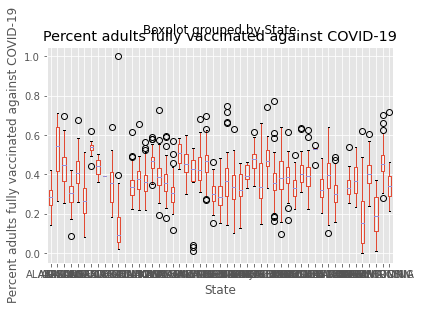

In [13]:
vacc_percent = vacc[['State', 'Percent adults fully vaccinated against COVID-19']]
vacc_percent.boxplot(by='State', column='Percent adults fully vaccinated against COVID-19')
plt.ylabel('Percent adults fully vaccinated against COVID-19')

In [ ]:
vacc['text'] = 'Fully vaccinated' + vacc['Percent adults fully vaccinated against COVID-19'].astype(str) + 'State' + vacc['State Code']
data = [dict(type = 'choropleth', autocolorscale=False, locations=vacc['State Code'], locationmode = 'US States', text = vacc['text'], colorscale ='custom-colorscale',\
            colorbar =dict(title= 'Percent fully vaccinated'))]
data

In [ ]:
layout = dict(title = 'Percent fully vaccinated', geo =dict(scope ='USA', projection =dict(type ='albers usa'), showlakes =True, lakecolor ='rgb(66, 165, 245)',),)
layout

In [ ]:
fig = dict(data =data, layout =layout)
py.iplot(fig, filename ='d3-choropleth-map')

In [ ]:
# Histogram showing percent adults fully vaccinated against Covid-19

px.histogram(vacc, x="Percent adults fully vaccinated against COVID-19", hover_data=vacc.columns)

# hist_data = list(vacc['Percent adults fully vaccinated against COVID-19'])
# group_labels = ['distplot'] # name of the dataset

# fig = ff.create_distplot(hist_data, group_labels)
# fig.show()

In [ ]:
#Calculated median accounting for nan values
np.nanmedian(vacc["Percent adults fully vaccinated against COVID-19"])

In [ ]:
vacc["Percent adults fully vaccinated against COVID-19"].describe()

In [ ]:
#get quartiles
q1, q2, q3 = vacc["Percent adults fully vaccinated against COVID-19"].quantile(q=[0.25,0.5,0.75])

#create conditions
conditions =[\
    (vacc["Percent adults fully vaccinated against COVID-19"]<=q1),\
    (vacc["Percent adults fully vaccinated against COVID-19"]>q1) & (vacc["Percent adults fully vaccinated against COVID-19"]<=q2),\
    (vacc["Percent adults fully vaccinated against COVID-19"]>q2) & (vacc["Percent adults fully vaccinated against COVID-19"]<=q3),\
    (vacc["Percent adults fully vaccinated against COVID-19"]>q3) 
            ]
values = [1, 2, 3, 4]
vacc['vacpop quartile'] =np.select(conditions, values)